In [1]:
# Pandas library for the pandas dataframes
import pandas as pd    
import numpy as np

# Import Scikit-Learn library for decision tree models
import sklearn         
from sklearn import linear_model, datasets
from sklearn.utils import resample
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score


# Import plotting libraries
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt

# Set larger fontsize for all plots
matplotlib.rcParams.update({'font.size': 18})
from IPython.display import clear_output

# Command to automatically reload modules before executing cells
# not needed here but might be if you are writing your own library 
%load_ext autoreload
%autoreload 2

In [4]:
data = pd.read_csv('data.csv')
data.pop('Unnamed: 32')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
# Removing unecessary columns

data['diagnosis'] = data['diagnosis'].replace('B',0);
data['diagnosis'] = data['diagnosis'].replace('M',1);
# Transpose performed because labels are originally in row form. [2:] specified so X does not include 'id' and 'diagnosis'
y = data.diagnosis
X = data.T
x = X[2:]
x = x.T

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Decision Tree

In [35]:
# Default criterion is GINI index
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [36]:
y_pred = classifier.predict(X_test)

In [37]:
print("Prediction accuracy MSE: ", mean_squared_error(y_test, y_pred))

Prediction accuracy MSE:  0.05263157894736842


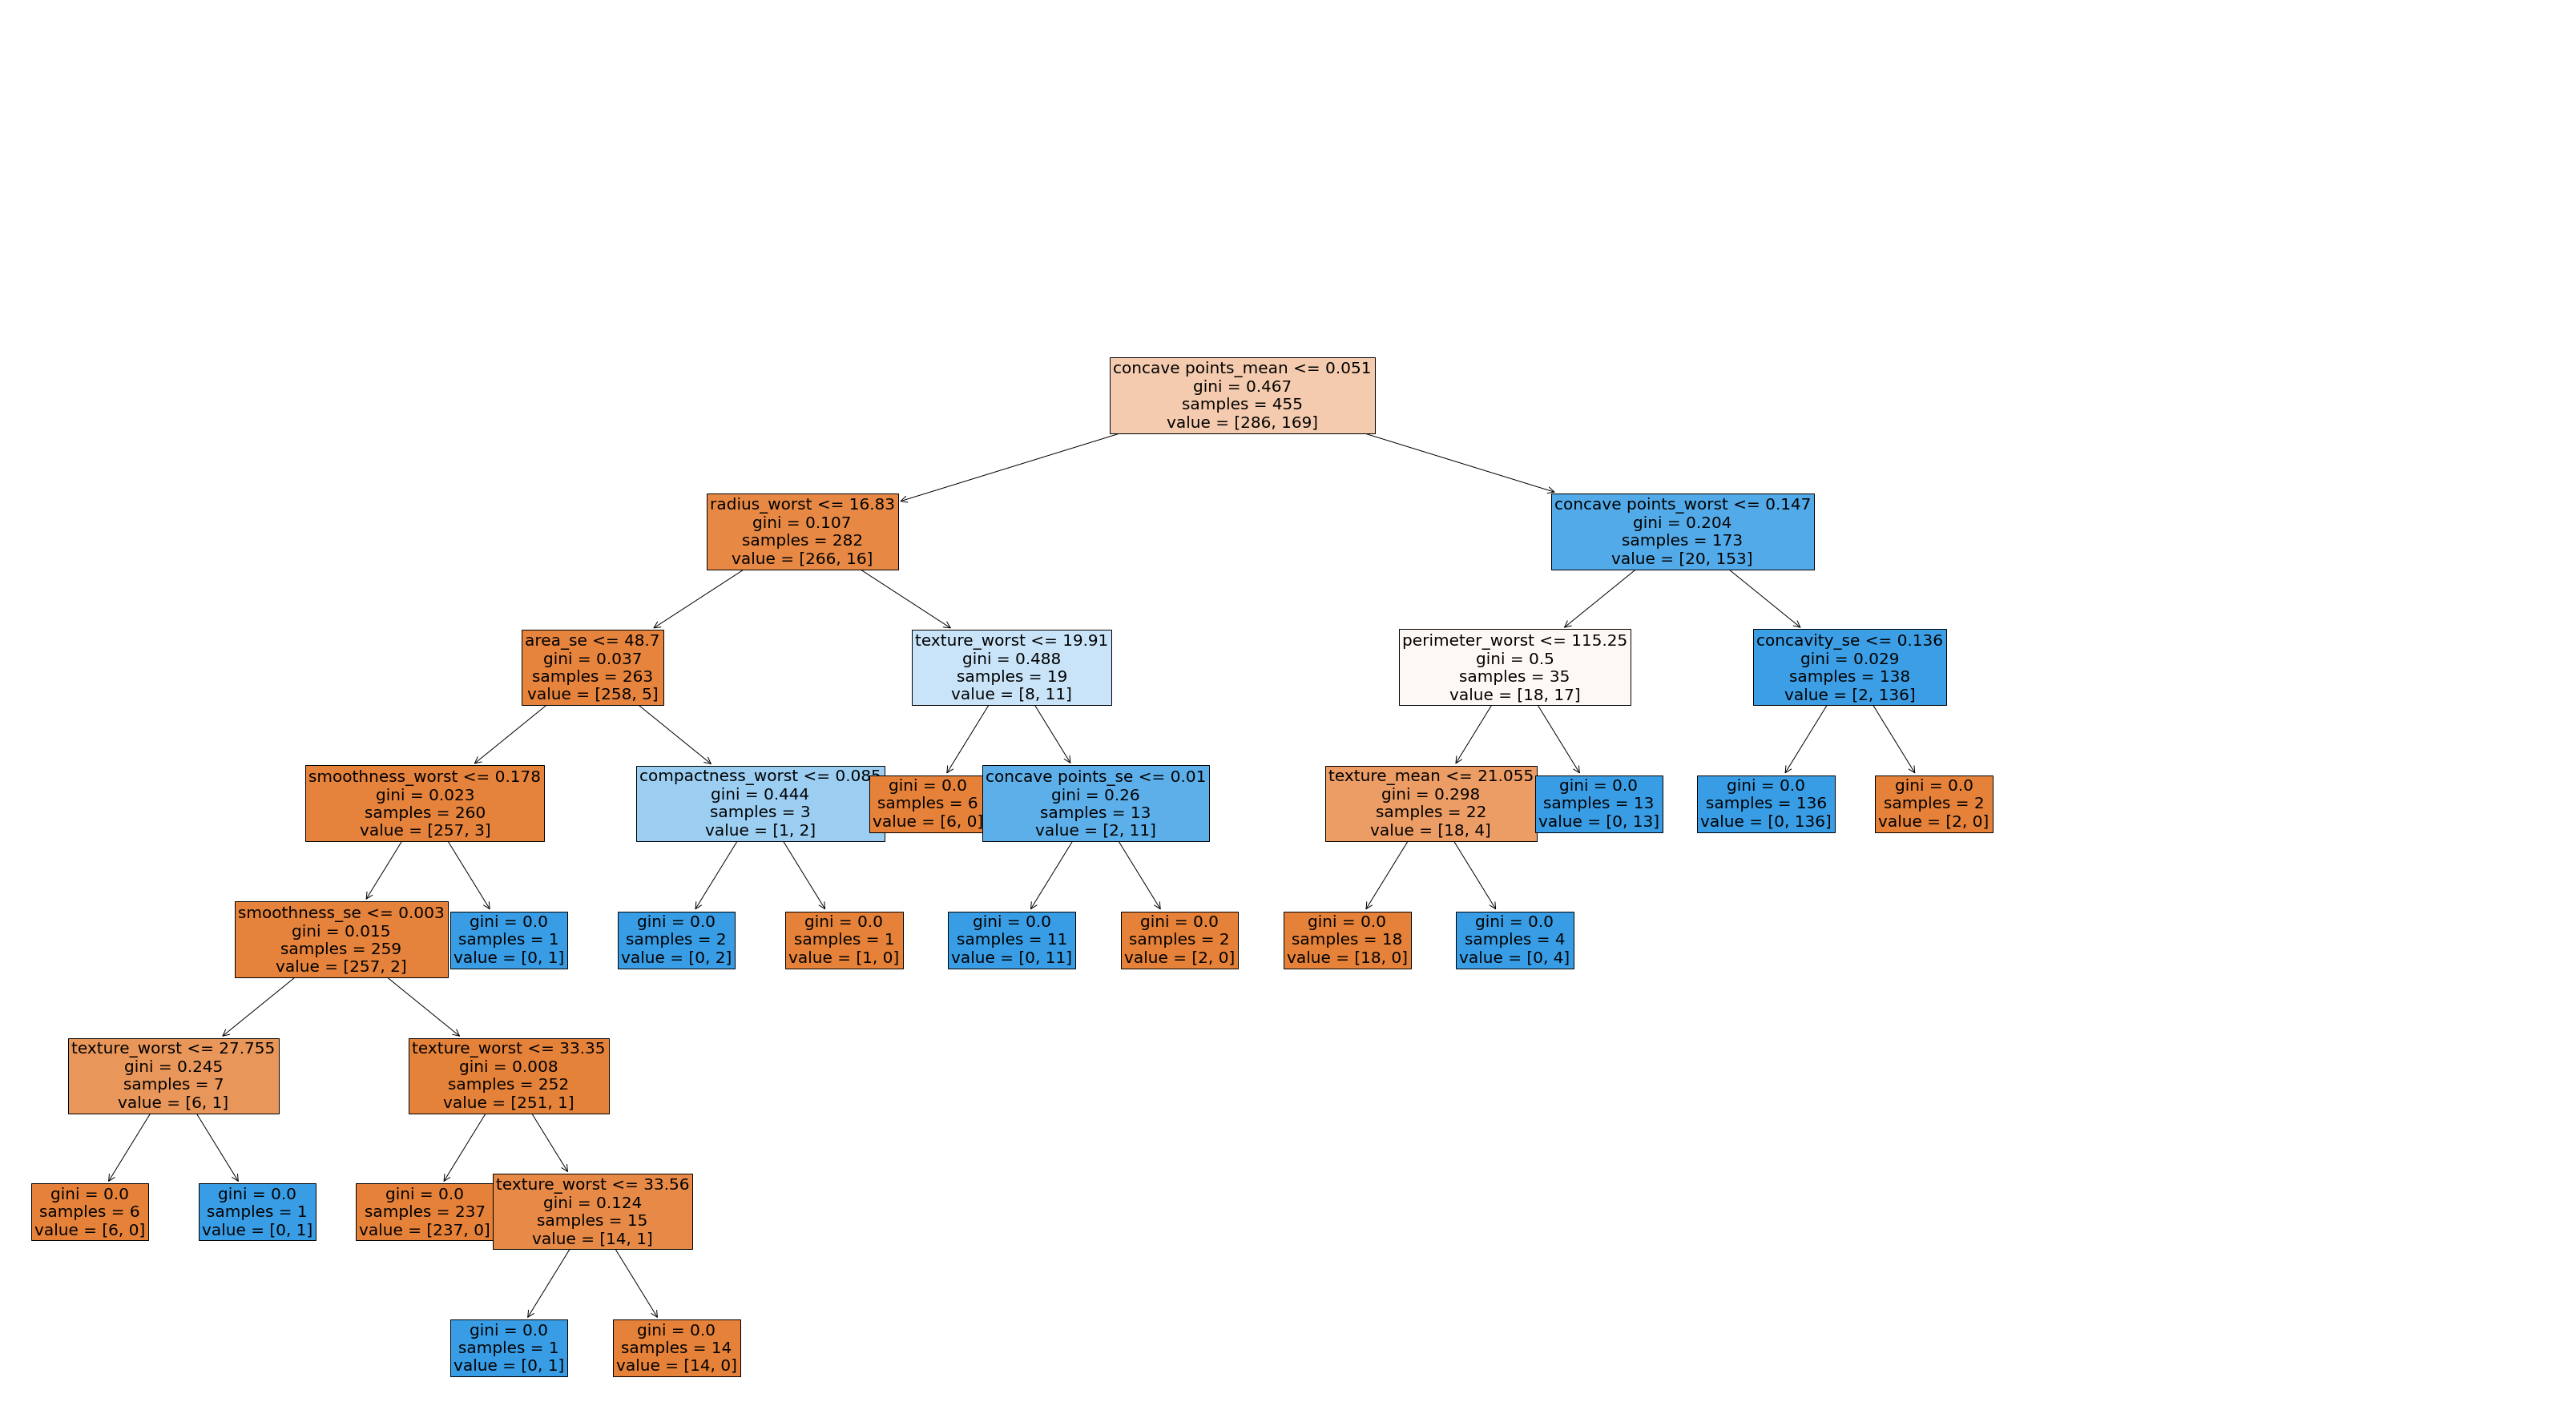

In [38]:
fig = plt.figure(figsize=(45,25))
_ = tree.plot_tree(classifier, feature_names=x.columns, filled=True,fontsize=20)
plt.tight_layout()

### Bagging Decision Tree

In [39]:
clf_bag = BaggingClassifier(base_estimator=classifier, n_estimators=50, random_state=42)
clf_bag = clf_bag.fit(X_train, y_train)
print("Estimator", clf_bag.base_estimator_)
print("Boostrapping with replacement", clf_bag.bootstrap)
print("Names of classes", clf_bag.classes_)
print("Number of classes", clf_bag.n_classes_)

Estimator DecisionTreeClassifier()
Boostrapping with replacement True
Names of classes [0 1]
Number of classes 2


In [42]:
y_bag = clf_bag.predict(X_test)
print("Mean accuracy on test set", clf_bag.score(X_test, y_test))
print("Accuracy score", accuracy_score(y_test, y_bag))

Mean accuracy on test set 0.956140350877193
Accuracy score 0.956140350877193


### Random Forests

In [44]:
clf_RF = RandomForestClassifier(n_estimators=50, random_state=42)
clf_RF = clf_RF.fit(X_train, y_train)

print("Estimator", clf_RF.base_estimator_)
print("Maximum depth", clf_RF.max_depth)
print("Boostrapping with replacement", clf_RF.bootstrap)
print("Names of classes", clf_RF.classes_)
print("Number of classes", clf_RF.n_classes_)

print("Mean accuracy on test set", clf_RF.score(X_test, y_test))

y_RF = clf_RF.predict(X_test)

print("Accuracy score", accuracy_score(y_test, y_RF))

Estimator DecisionTreeClassifier()
Maximum depth None
Boostrapping with replacement True
Names of classes [0 1]
Number of classes 2
Mean accuracy on test set 0.9649122807017544
Accuracy score 0.9649122807017544


In [50]:
print(y_test.shape)

(114,)


<bound method Figure.tight_layout of <Figure size 2160x432 with 3 Axes>>

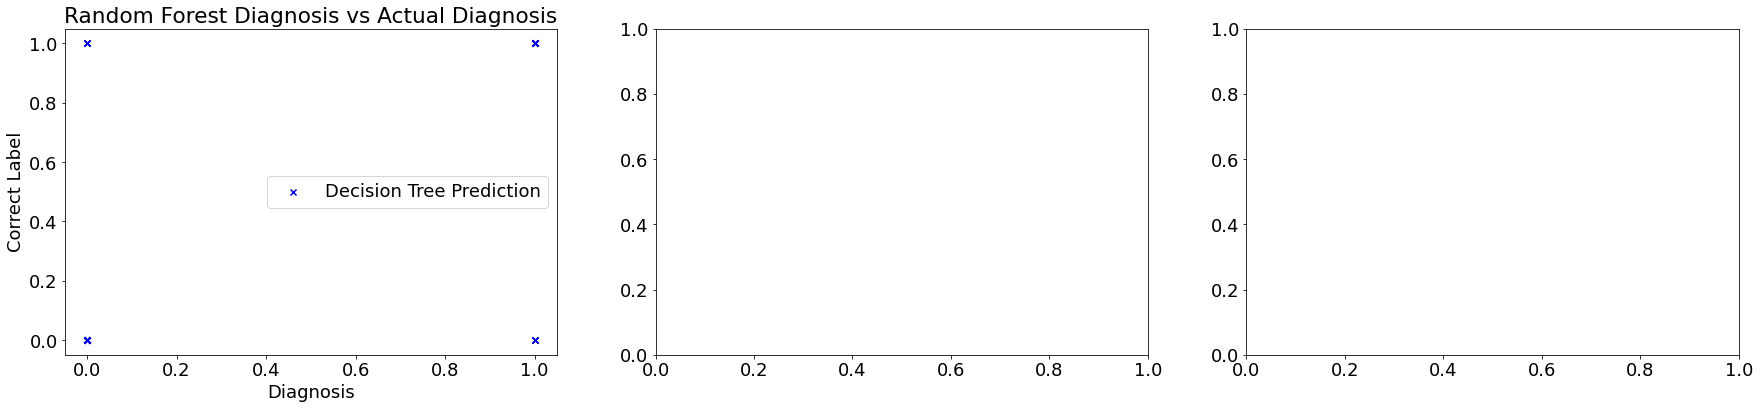

In [59]:
fig = plt.figure(figsize=(30, 6))
# diagnosis = np.linspace(0, 1, 114)
ax = fig.subplots(nrows=1, ncols=3)

# ax[0].scatter(diagnosis, y_test, c='r', marker='o', label='Actual Diagnosis')
ax[0].scatter(y_test, y_pred, c='b', marker='x', label='Decision Tree Prediction')
ax[0].set_xlabel('Diagnosis')
ax[0].set_ylabel('Correct Label')
ax[0].set_title('Random Forest Diagnosis vs Actual Diagnosis')
ax[0].legend()

# ax[1].scatter(diagnosis, y_test, c='r', marker='o', label='Actual Diagnosis')
# ax[1].scatter(diagnosis, y_RF, c='b', marker='x', label='Random Forest Prediction')
# ax[1].set_xlabel('Diagnosis')
# ax[1].set_ylabel('Correct Label')
# ax[1].set_title('Random Forest Diagnosis vs Actual Diagnosis')
# ax[1].legend()

# ax[2].scatter(diagnosis, y_test, c='r', marker='o', label='Actual Diagnosis')
# ax[2].scatter(diagnosis, y_bag, c='b', marker='x', label='Bagging Decision Tree Prediction')
# ax[2].set_xlabel('Diagnosis')
# ax[2].set_ylabel('Correct Label')
# ax[2].set_title('Random Forest Diagnosis vs Actual Diagnosis')
# ax[2].legend()

fig.tight_layout